# CNN CIFAR-10

In this notebook we make a Convolutional Neural Network for classifying images in the CIFAR-10 with the goal of getting as high of an accuracy as possible.<br><br>
The CIFAR-10 dataset includes 10 classes, with 5 thousand training images per class and 1 thousand testing
images per class. 
<br>
Example images: <br>
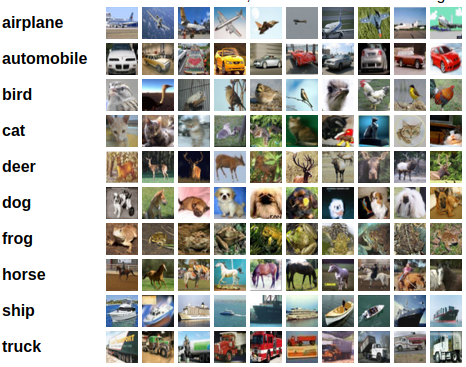

In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.optimizers import Adam

from keras import regularizers
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from plot_keras_history import show_history, plot_history

Load dataset en split in train/test sets

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Set input shape and reshape the train/test dataset

In [8]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

Flatten the test data so we can compare it later to our output

In [9]:
y_train = y_train.flatten()
y_test = y_test.flatten()

As stated in the intro, the dataset is divided into 10 classes and each class has 5000 training images

C:\Users\ayoub\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


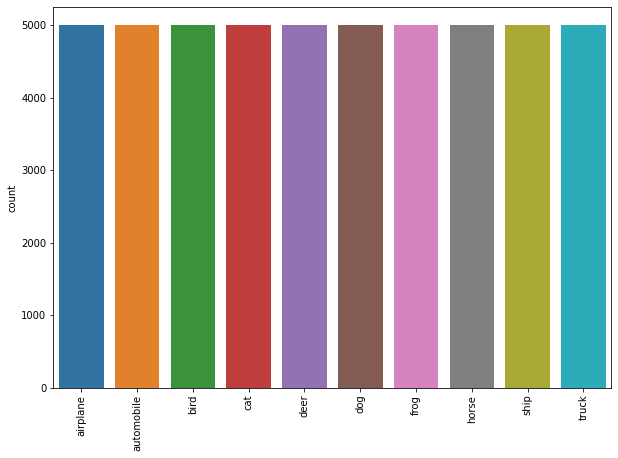

In [10]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train)
p.set(xticklabels=classes)
var = p.set_xticklabels(p.get_xticklabels(), rotation=90)

Turn test data into one hot vectors

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

Model parameters

In [119]:
# parameters as described in the paper
batch_size = 128
num_classes = 10
epochs = 250
weight_decay = 0.0005 

Credit for the model goes to the following [paper](#Credits) and [Github](#Credits)<br>

The model is built out of the following architecture (which can be seen in the paper at fig. 4): <br>
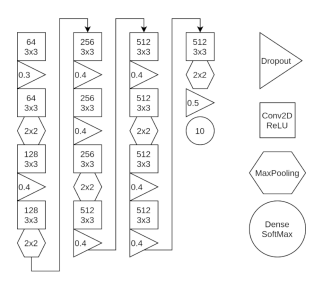

In [120]:
def cnn_model():
    # Build the network as described in the paper
    model = Sequential()

    # There will be no padding in this model
    model.add(Conv2D(64, (3, 3), padding='same', # Add regulizers with above mentioned weight_decay
                     input_shape=x_train.shape[1:],kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu')) # The activation function is always the relu in conv layers
    model.add(BatchNormalization()) # Normalize inputs
    model.add(Dropout(0.3)) # Add big dropouts. The will range from from 0.3 to 0.5

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2))) # Downsize the inputs


    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(num_classes)) # Final (output)layer with the amount of classes as each output
    model.add(Activation('softmax')) # Softmax for the final output activation
    return model

#### Initialize and compile the model

In [121]:
model = cnn_model()

In [122]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_143 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 activation_155 (Activation)  (None, 32, 32, 64)       0         
                                                                 
 batch_normalization_144 (Ba  (None, 32, 32, 64)       256       
 tchNormalization)                                               
                                                                 
 dropout_100 (Dropout)       (None, 32, 32, 64)        0         
                                                                 
 conv2d_144 (Conv2D)         (None, 32, 32, 128)       73856     
                                                                 
 activation_156 (Activation)  (None, 32, 32, 128)      0         
                                                     

                                                                 
 dropout_108 (Dropout)       (None, 1, 1, 512)         0         
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
 activation_168 (Activation)  (None, 10)               0         
                                                                 
Total params: 14,847,626
Trainable params: 14,839,050
Non-trainable params: 8,576
_________________________________________________________________


In [124]:
# The desire here is to create a checkpoint that saves the best model, 
# sadly however it is not usable because of an error
checkpoint = ModelCheckpoint('best_model.h5',  
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only= True, 
                             mode='max')

In [125]:
model.compile(loss='categorical_crossentropy',
              # Adam seems to be the best optimizer.
              # And lr of 0.0001 gives the best result after small tests.
              optimizer=Adam(learning_rate=1.0e-4), 
              metrics = ['accuracy']) 

#### Train the model

In [126]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs = epochs,
                    validation_data= (x_test, y_test),
                    callbacks=[checkpoint],
                    verbose=2)

Epoch 1/250
391/391 - 36s - loss: 5.1692 - accuracy: 0.1745 - val_loss: 6.0978 - val_accuracy: 0.1021 - 36s/epoch - 91ms/step
Epoch 2/250
391/391 - 33s - loss: 4.2148 - accuracy: 0.2709 - val_loss: 4.8213 - val_accuracy: 0.1955 - 33s/epoch - 84ms/step
Epoch 3/250
391/391 - 34s - loss: 3.8553 - accuracy: 0.3472 - val_loss: 7.2073 - val_accuracy: 0.3038 - 34s/epoch - 86ms/step
Epoch 4/250
391/391 - 33s - loss: 3.6842 - accuracy: 0.3981 - val_loss: 5.6220 - val_accuracy: 0.3455 - 33s/epoch - 83ms/step
Epoch 5/250
391/391 - 32s - loss: 3.5205 - accuracy: 0.4397 - val_loss: 8.8635 - val_accuracy: 0.3658 - 32s/epoch - 83ms/step
Epoch 6/250
391/391 - 33s - loss: 3.3874 - accuracy: 0.4787 - val_loss: 55.4117 - val_accuracy: 0.3357 - 33s/epoch - 85ms/step
Epoch 7/250
391/391 - 33s - loss: 3.2810 - accuracy: 0.5166 - val_loss: 6.3586 - val_accuracy: 0.4161 - 33s/epoch - 85ms/step
Epoch 8/250
391/391 - 34s - loss: 3.0931 - accuracy: 0.5523 - val_loss: 14.2678 - val_accuracy: 0.4483 - 34s/epoch - 

Epoch 66/250
391/391 - 31s - loss: 0.6244 - accuracy: 0.9631 - val_loss: 1.0817 - val_accuracy: 0.8606 - 31s/epoch - 79ms/step
Epoch 67/250
391/391 - 30s - loss: 0.6290 - accuracy: 0.9608 - val_loss: 1.1258 - val_accuracy: 0.8490 - 30s/epoch - 78ms/step
Epoch 68/250
391/391 - 31s - loss: 0.6215 - accuracy: 0.9630 - val_loss: 1.0779 - val_accuracy: 0.8672 - 31s/epoch - 79ms/step
Epoch 69/250
391/391 - 30s - loss: 0.6099 - accuracy: 0.9650 - val_loss: 1.0825 - val_accuracy: 0.8602 - 30s/epoch - 76ms/step
Epoch 70/250
391/391 - 30s - loss: 0.6091 - accuracy: 0.9647 - val_loss: 1.1044 - val_accuracy: 0.8524 - 30s/epoch - 76ms/step
Epoch 71/250
391/391 - 30s - loss: 0.6014 - accuracy: 0.9663 - val_loss: 1.0584 - val_accuracy: 0.8684 - 30s/epoch - 78ms/step
Epoch 72/250
391/391 - 30s - loss: 0.6012 - accuracy: 0.9660 - val_loss: 1.1268 - val_accuracy: 0.8556 - 30s/epoch - 77ms/step
Epoch 73/250
391/391 - 30s - loss: 0.5930 - accuracy: 0.9673 - val_loss: 1.0963 - val_accuracy: 0.8601 - 30s/ep

Epoch 131/250
391/391 - 32s - loss: 0.4593 - accuracy: 0.9780 - val_loss: 0.8969 - val_accuracy: 0.8838 - 32s/epoch - 83ms/step
Epoch 132/250
391/391 - 33s - loss: 0.4559 - accuracy: 0.9777 - val_loss: 0.9437 - val_accuracy: 0.8758 - 33s/epoch - 84ms/step
Epoch 133/250
391/391 - 33s - loss: 0.4557 - accuracy: 0.9772 - val_loss: 0.8926 - val_accuracy: 0.8803 - 33s/epoch - 84ms/step
Epoch 134/250
391/391 - 33s - loss: 0.4601 - accuracy: 0.9763 - val_loss: 0.9366 - val_accuracy: 0.8751 - 33s/epoch - 84ms/step
Epoch 135/250
391/391 - 33s - loss: 0.4682 - accuracy: 0.9754 - val_loss: 0.9097 - val_accuracy: 0.8811 - 33s/epoch - 84ms/step
Epoch 136/250
391/391 - 33s - loss: 0.4540 - accuracy: 0.9789 - val_loss: 0.9176 - val_accuracy: 0.8808 - 33s/epoch - 84ms/step
Epoch 137/250
391/391 - 33s - loss: 0.4537 - accuracy: 0.9776 - val_loss: 0.9180 - val_accuracy: 0.8772 - 33s/epoch - 84ms/step
Epoch 138/250
391/391 - 33s - loss: 0.4535 - accuracy: 0.9775 - val_loss: 0.9439 - val_accuracy: 0.8726 

391/391 - 32s - loss: 0.4113 - accuracy: 0.9821 - val_loss: 0.9056 - val_accuracy: 0.8815 - 32s/epoch - 82ms/step
Epoch 196/250
391/391 - 32s - loss: 0.4139 - accuracy: 0.9806 - val_loss: 0.8601 - val_accuracy: 0.8849 - 32s/epoch - 82ms/step
Epoch 197/250
391/391 - 32s - loss: 0.4105 - accuracy: 0.9809 - val_loss: 0.8678 - val_accuracy: 0.8847 - 32s/epoch - 82ms/step
Epoch 198/250
391/391 - 32s - loss: 0.4129 - accuracy: 0.9802 - val_loss: 0.8314 - val_accuracy: 0.8880 - 32s/epoch - 82ms/step
Epoch 199/250
391/391 - 32s - loss: 0.4054 - accuracy: 0.9818 - val_loss: 0.8137 - val_accuracy: 0.8907 - 32s/epoch - 82ms/step
Epoch 200/250
391/391 - 32s - loss: 0.4094 - accuracy: 0.9819 - val_loss: 0.8369 - val_accuracy: 0.8907 - 32s/epoch - 81ms/step
Epoch 201/250
391/391 - 32s - loss: 0.4119 - accuracy: 0.9808 - val_loss: 0.8729 - val_accuracy: 0.8811 - 32s/epoch - 81ms/step
Epoch 202/250
391/391 - 32s - loss: 0.4107 - accuracy: 0.9813 - val_loss: 0.8866 - val_accuracy: 0.8808 - 32s/epoch - 

#### Evaluate the model 

In [127]:
scores = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 - 3s - loss: 0.8060 - accuracy: 0.8952 - 3s/epoch - 10ms/step
Accuracy: 89.52%


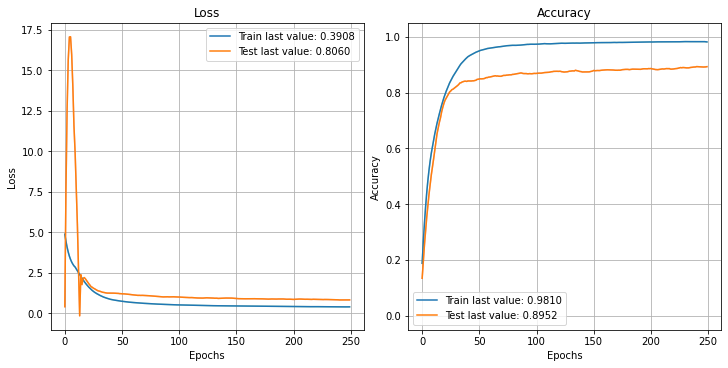

In [128]:
plot_history(history, path="interpolated.png", interpolate=True)
plt.show()
plt.close()

In [164]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

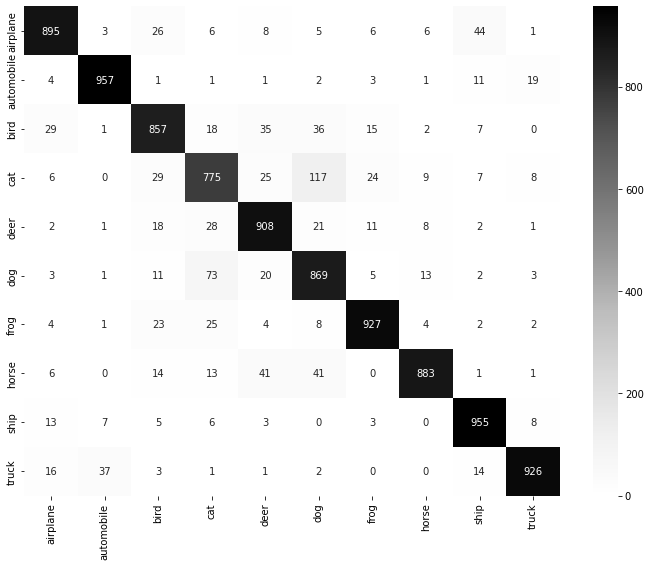

In [165]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Greys')
c.set(xticklabels=classes, yticklabels=classes)
var = c.set_xticklabels(c.get_xticklabels(), rotation=90)

**Conclusion**: after reconstructing the architecture as was shown in the paper, we get an accuracy of `89.52%`! The model performs exceptionally well on each class as they all have an accuracy that's slightly below/above 90%. The only class the model does not perform well on are the predictions on cats. Here the accuracy is below 80%.<br>
After plotting the model history, we can see that both the accuracy as well as the loss slowly keeps getting better and better even after 250 epochs. There is no point where the model's performance starts to become negative, making the possibility for overfitting very small. The confusion matrix looks very well balanced as well, the only thing that slightly sticks are the predictions between cats and dogs, which sometimes get confused between one another.

---

## Improving the model
Next, we will augment and normalize the data and retrain the model to see if there's a difference in result.

Same parameters

In [141]:
batch_size = 128
num_classes = 10
epochs = 250
weight_decay = 0.0005

Augment the train data to make it more robust

In [167]:
#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,  
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)
datagen.fit(x_train)

Normalize the data

In [168]:
def normalize(X_train,X_test):
    #this function normalize inputs for zero mean and unit variance
    # it is used when training a model.
    # Input: training set and test set
    # Output: normalized training set and test set according to the trianing set statistics.
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train, axis=(0, 1, 2, 3))
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test

In [169]:
x_train, x_test = normalize(x_train, x_test)

Initialize, compile and train a new model.

In [142]:
model_v2 = cnn_model()

In [143]:
checkpoint_v2 = ModelCheckpoint('best_model_simple.h5',  
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only= True,
                             save_weights_only=True,
                             mode='max')

In [144]:
model_v2.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=1.0e-4),
              metrics = ['accuracy']) 

In [145]:
history_v2 = model_v2.fit(x_train, y_train, batch_size=batch_size,
                    epochs = epochs,
                    validation_data= (x_test, y_test),
                    callbacks=[checkpoint_v2],
                    verbose=2)

Epoch 1/250
391/391 - 35s - loss: 5.1994 - accuracy: 0.1737 - val_loss: 5.4100 - val_accuracy: 0.1179 - 35s/epoch - 89ms/step
Epoch 2/250
391/391 - 32s - loss: 4.2071 - accuracy: 0.2751 - val_loss: 4.6656 - val_accuracy: 0.2047 - 32s/epoch - 81ms/step
Epoch 3/250
391/391 - 32s - loss: 3.8826 - accuracy: 0.3401 - val_loss: 7.6348 - val_accuracy: 0.2010 - 32s/epoch - 82ms/step
Epoch 4/250
391/391 - 32s - loss: 3.6817 - accuracy: 0.3892 - val_loss: 5.7774 - val_accuracy: 0.2680 - 32s/epoch - 82ms/step
Epoch 5/250
391/391 - 32s - loss: 3.5340 - accuracy: 0.4335 - val_loss: 7.9025 - val_accuracy: 0.2947 - 32s/epoch - 82ms/step
Epoch 6/250
391/391 - 32s - loss: 3.4193 - accuracy: 0.4657 - val_loss: 6.1168 - val_accuracy: 0.3441 - 32s/epoch - 81ms/step
Epoch 7/250
391/391 - 32s - loss: 3.2657 - accuracy: 0.5089 - val_loss: 18.4817 - val_accuracy: 0.3597 - 32s/epoch - 82ms/step
Epoch 8/250
391/391 - 32s - loss: 3.1419 - accuracy: 0.5433 - val_loss: 8.4730 - val_accuracy: 0.3930 - 32s/epoch - 8

Epoch 66/250
391/391 - 32s - loss: 0.6255 - accuracy: 0.9638 - val_loss: 1.0691 - val_accuracy: 0.8627 - 32s/epoch - 82ms/step
Epoch 67/250
391/391 - 32s - loss: 0.6294 - accuracy: 0.9619 - val_loss: 1.1182 - val_accuracy: 0.8557 - 32s/epoch - 82ms/step
Epoch 68/250
391/391 - 32s - loss: 0.6296 - accuracy: 0.9630 - val_loss: 1.0768 - val_accuracy: 0.8595 - 32s/epoch - 82ms/step
Epoch 69/250
391/391 - 33s - loss: 0.6161 - accuracy: 0.9651 - val_loss: 1.1070 - val_accuracy: 0.8590 - 33s/epoch - 84ms/step
Epoch 70/250
391/391 - 32s - loss: 0.6046 - accuracy: 0.9672 - val_loss: 1.1198 - val_accuracy: 0.8590 - 32s/epoch - 82ms/step
Epoch 71/250
391/391 - 32s - loss: 0.6025 - accuracy: 0.9661 - val_loss: 1.0713 - val_accuracy: 0.8614 - 32s/epoch - 82ms/step
Epoch 72/250
391/391 - 32s - loss: 0.6034 - accuracy: 0.9647 - val_loss: 1.0654 - val_accuracy: 0.8618 - 32s/epoch - 83ms/step
Epoch 73/250
391/391 - 33s - loss: 0.6198 - accuracy: 0.9623 - val_loss: 1.0571 - val_accuracy: 0.8646 - 33s/ep

Epoch 131/250
391/391 - 34s - loss: 0.4727 - accuracy: 0.9747 - val_loss: 0.9412 - val_accuracy: 0.8736 - 34s/epoch - 86ms/step
Epoch 132/250
391/391 - 32s - loss: 0.4706 - accuracy: 0.9761 - val_loss: 0.9223 - val_accuracy: 0.8778 - 32s/epoch - 82ms/step
Epoch 133/250
391/391 - 32s - loss: 0.4575 - accuracy: 0.9778 - val_loss: 0.9185 - val_accuracy: 0.8812 - 32s/epoch - 83ms/step
Epoch 134/250
391/391 - 32s - loss: 0.4531 - accuracy: 0.9789 - val_loss: 0.9321 - val_accuracy: 0.8802 - 32s/epoch - 82ms/step
Epoch 135/250
391/391 - 32s - loss: 0.4549 - accuracy: 0.9780 - val_loss: 0.9174 - val_accuracy: 0.8773 - 32s/epoch - 82ms/step
Epoch 136/250
391/391 - 32s - loss: 0.4557 - accuracy: 0.9775 - val_loss: 0.9423 - val_accuracy: 0.8775 - 32s/epoch - 83ms/step
Epoch 137/250
391/391 - 32s - loss: 0.4629 - accuracy: 0.9772 - val_loss: 0.9025 - val_accuracy: 0.8819 - 32s/epoch - 82ms/step
Epoch 138/250
391/391 - 32s - loss: 0.4598 - accuracy: 0.9768 - val_loss: 0.8981 - val_accuracy: 0.8784 

391/391 - 32s - loss: 0.4212 - accuracy: 0.9802 - val_loss: 0.8491 - val_accuracy: 0.8882 - 32s/epoch - 81ms/step
Epoch 196/250
391/391 - 32s - loss: 0.4161 - accuracy: 0.9807 - val_loss: 0.8569 - val_accuracy: 0.8863 - 32s/epoch - 81ms/step
Epoch 197/250
391/391 - 32s - loss: 0.4118 - accuracy: 0.9824 - val_loss: 0.8524 - val_accuracy: 0.8881 - 32s/epoch - 81ms/step
Epoch 198/250
391/391 - 32s - loss: 0.4183 - accuracy: 0.9799 - val_loss: 0.8721 - val_accuracy: 0.8816 - 32s/epoch - 81ms/step
Epoch 199/250
391/391 - 32s - loss: 0.4030 - accuracy: 0.9837 - val_loss: 0.8825 - val_accuracy: 0.8879 - 32s/epoch - 81ms/step
Epoch 200/250
391/391 - 32s - loss: 0.4073 - accuracy: 0.9812 - val_loss: 0.8745 - val_accuracy: 0.8857 - 32s/epoch - 81ms/step
Epoch 201/250
391/391 - 32s - loss: 0.4067 - accuracy: 0.9815 - val_loss: 0.9049 - val_accuracy: 0.8794 - 32s/epoch - 81ms/step
Epoch 202/250
391/391 - 32s - loss: 0.4028 - accuracy: 0.9827 - val_loss: 0.8436 - val_accuracy: 0.8874 - 32s/epoch - 

In [146]:
scores = model_v2.evaluate(x_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 - 3s - loss: 0.8113 - accuracy: 0.8888 - 3s/epoch - 10ms/step
Accuracy: 88.88%


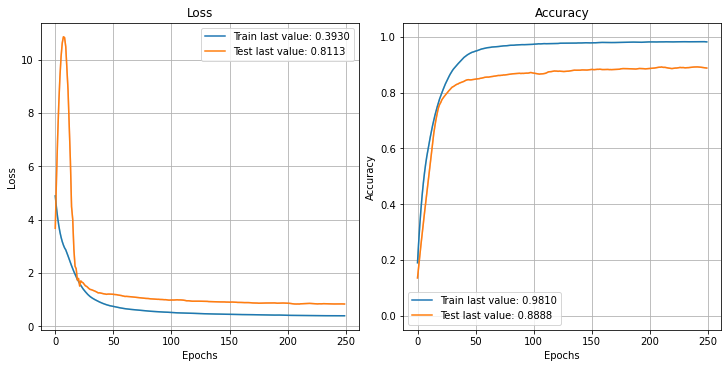

In [147]:
plot_history(history_v2, path="interpolated.png", interpolate=True)
plt.show()
plt.close()

In [170]:
# Predict the values from the validation dataset
y_pred = model_v2.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

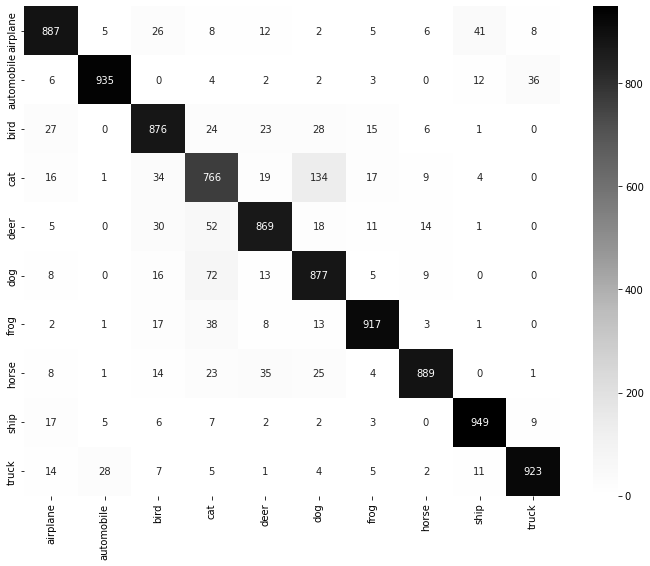

In [171]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Greys')
c.set(xticklabels=classes, yticklabels=classes)
var = c.set_xticklabels(c.get_xticklabels(), rotation=90)

**Conclusion**: the second model performs virtually the same as the first. Just like the first model, the second model hovers at around 88% and 89% accuracy after 200 epochs. It's slightly worse as accuracy of the testset is starting to have a downwards trends near the end (sign of overfitting). The confusion matrix also looks practically the same, with the same the same issue where dogs and cats sometimes get confused with each other.  <br>
Sadly, augmenting and normalizing the data did not lead to an improvement to the performance. Both the loss as well as the accuracy performed slightly worse. The final accuracy is `88.88%`

# Credits
- https://arxiv.org/pdf/2002.03846.pdf
- https://github.com/geifmany/cifar-vgg/blob/e3f04aa425c2fbb4ca9e3c52f8457cdbcdae4574/cifar100vgg.py